## Logistic Regression

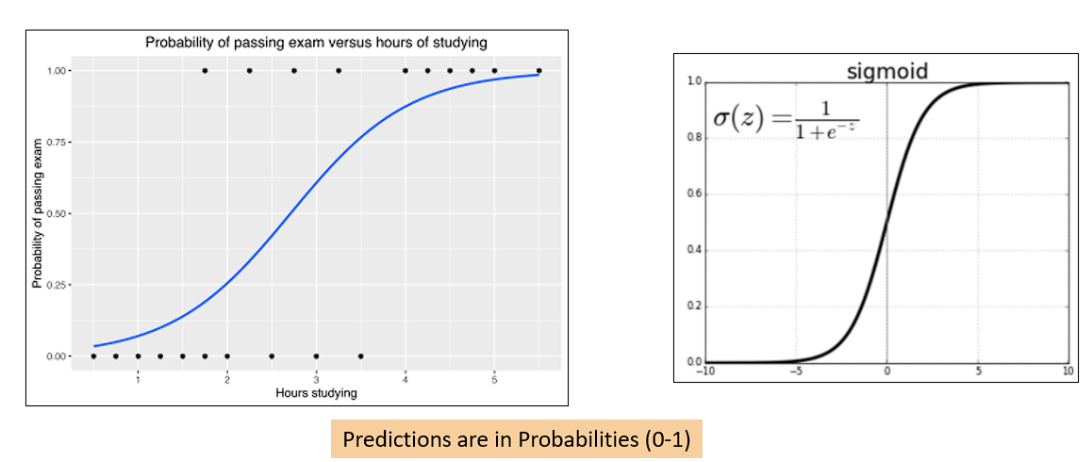

In [ ]:

from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : read the data

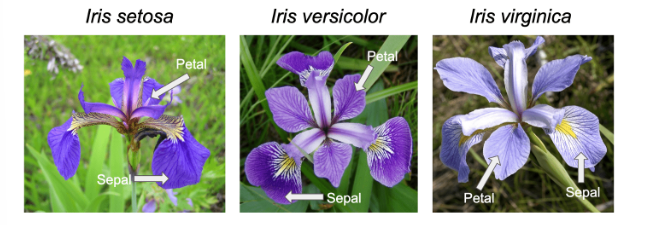

In [1]:
import pandas as pd 
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()


1

### Step 3: Seperate X and Y(species)

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
Y.value_counts()


species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

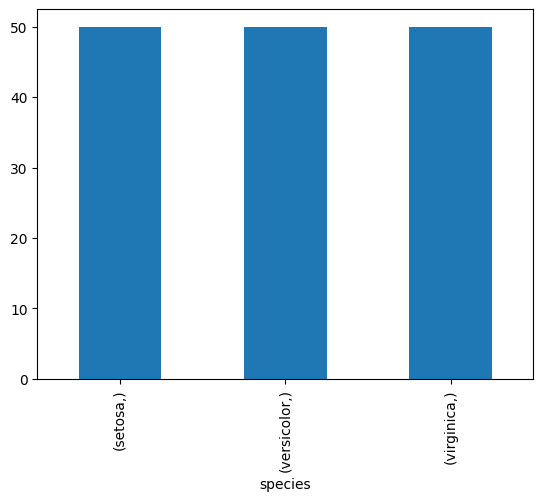

In [10]:
Y.value_counts().plot(kind='bar')


### Step 4: Apply preprocessing on X

In [12]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [14]:

X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Step 5: Apply Train test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=21)

In [16]:
xtrain.head()


,sepal_length,sepal_width,petal_length,petal_width
52,1.280340,0.098217,0.649083,0.395774
49,-1.021849,0.558611,-1.340227,-1.315444
65,1.038005,0.098217,0.364896,0.264142
118,2.249683,-1.052767,1.785832,1.448832
55,-0.173674,-0.592373,0.421734,0.132510


In [17]:
ytrain.head()


,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [18]:
xtest.head()


,sepal_length,sepal_width,petal_length,petal_width
92,-0.052506,-1.052767,0.137547,0.000878
44,-0.900681,1.709595,-1.056039,-1.052180
7,-1.021849,0.788808,-1.283389,-1.315444
21,-0.900681,1.479398,-1.283389,-1.052180
95,-0.173674,-0.131979,0.251221,0.000878


In [19]:
ytest.head()


,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


### Step 6: Model Building

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

c:\Machine Lerning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [21]:
model.classes_


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
model.intercept_


array([-0.1627398 ,  1.82302367, -1.66028386])

In [23]:
model.coef_


array([[-0.93728904,  1.24988548, -1.63694748, -1.61318588],
       [ 0.38686136, -0.37382492, -0.41064574, -0.59860246],
       [ 0.55042768, -0.87606056,  2.04759322,  2.21178835]])

### Step 7: Evaluating model

In [24]:

# Check accuracy in training
model.score(xtrain, ytrain)

0.98

In [25]:

# Check accuracy in testing
model.score(xtest, ytest)

0.94

In [26]:

ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [27]:
ypred_train[0:5]


array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [28]:
ytrain.head()



,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [29]:
ypred_test[0:5]


array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [30]:
ytest.head()


,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


### Plot the confusion matrix

In [31]:

model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

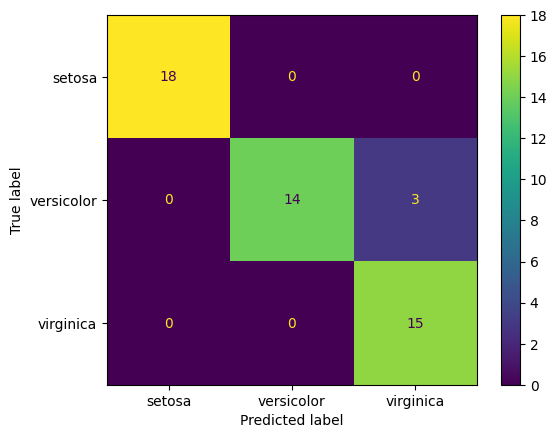

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

### Print the classification report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



In [34]:
ytest.value_counts()


species   
setosa        18
versicolor    17
virginica     15
Name: count, dtype: int64

### F1 Macro average is more than 80% on test data hence its a good model
#### Get the probability for train and test

In [35]:
yprob_train = model.predict_proba(xtrain)
yprob_test = model.predict_proba(xtest)

In [36]:
model.classes_


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [37]:
yprob_train[0:5]


array([[5.75880409e-03, 6.45418038e-01, 3.48823158e-01],
       [9.62761861e-01, 3.72374673e-02, 6.72037746e-07],
       [1.66195063e-02, 8.34477265e-01, 1.48903229e-01],
       [9.10378128e-08, 2.80040614e-03, 9.97199503e-01],
       [2.87063875e-02, 8.34113831e-01, 1.37179782e-01]])

In [38]:
yprob_test[0:5]


array([[2.05266705e-02, 9.13163097e-01, 6.63102325e-02],
       [9.87197937e-01, 1.28015060e-02, 5.57125997e-07],
       [9.72254534e-01, 2.77449526e-02, 5.12940556e-07],
       [9.85940619e-01, 1.40589883e-02, 3.92769779e-07],
       [8.81329982e-02, 8.60832662e-01, 5.10343401e-02]])

### Step 8 : Predict out of sample data

In [39]:

xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [40]:
num_pipe


Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

### Apply pre.transform on xnew

In [41]:

xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [42]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [43]:

probs = model.predict_proba(xnew_pre)
probs

array([[1.93292727e-02, 8.82537594e-01, 9.81331333e-02],
       [1.80315390e-04, 6.76221053e-02, 9.32197579e-01],
       [9.73213051e-02, 8.91868487e-01, 1.08102083e-02],
       [7.45709340e-01, 2.54116291e-01, 1.74368528e-04],
       [5.90541932e-03, 3.31763397e-01, 6.62331183e-01],
       [9.63296887e-01, 3.67026084e-02, 5.04715947e-07],
       [1.60683756e-01, 8.11677570e-01, 2.76386741e-02],
       [7.55605408e-04, 1.55677416e-01, 8.43566978e-01],
       [9.85175448e-01, 1.48243463e-02, 2.05612795e-07],
       [8.87027458e-01, 1.12886703e-01, 8.58384446e-05],
       [2.30367528e-02, 8.97506058e-01, 7.94571891e-02],
       [2.62907569e-02, 9.48058330e-01, 2.56509126e-02],
       [3.40647499e-06, 1.34534099e-02, 9.86543184e-01],
       [5.75880409e-03, 6.45418038e-01, 3.48823158e-01],
       [4.93349887e-04, 4.04352561e-01, 5.95154090e-01]])

In [44]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([0.88253759, 0.93219758, 0.89186849, 0.74570934, 0.66233118,
       0.96329689, 0.81167757, 0.84356698, 0.98517545, 0.88702746,
       0.89750606, 0.94805833, 0.98654318, 0.64541804, 0.59515409])

### Save above results in xnew

In [45]:
xnew['species_pred'] = preds
xnew['max_prob'] = max_probs

In [46]:
xnew


,sepal_length,sepal_width,petal_length,petal_width,species_pred,max_prob
0,5.5,2.5,4.0,1.3,versicolor,0.882538
1,6.9,3.1,5.1,2.3,virginica,0.932198
2,5.1,2.5,3.0,1.1,versicolor,0.891868
3,4.4,2.9,NaN,0.2,setosa,0.745709
4,5.9,3.0,5.1,1.8,virginica,0.662331
5,5.5,3.5,1.3,0.2,setosa,0.963297
6,5.6,NaN,3.6,1.3,versicolor,0.811678
7,6.5,3.0,5.2,2.0,virginica,0.843567
8,5.3,3.7,1.5,0.2,setosa,0.985175
9,5.1,3.4,1.5,NaN,setosa,0.887027


### Saving results to csv

In [47]:
xnew.to_csv('Results.csv', index=False)